# Plot Token Correction Rate in LayoutDM

In [1]:
%cd ..
%load_ext autoreload
%autoreload 2

/app


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
from __future__ import annotations

import matplotlib.pyplot as plt
import numpy as np
import os

import scienceplots

In [3]:
# define plot style
plt.style.use(['science','no-latex', 'grid'])
color_list = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Data Preparation

In [12]:
!python bin/test_token_correction.py download/pretrained_weights/rico25/layoutdm/0/ --num_replace 3 --save_dir ./layoutdm_correction
!python bin/test_token_correction.py download/pretrained_weights/rico25/layoutdm/0/ --num_replace 3 --save_dir ./layoutdm_correction -m

## Token Correction Performance of LayoutDM

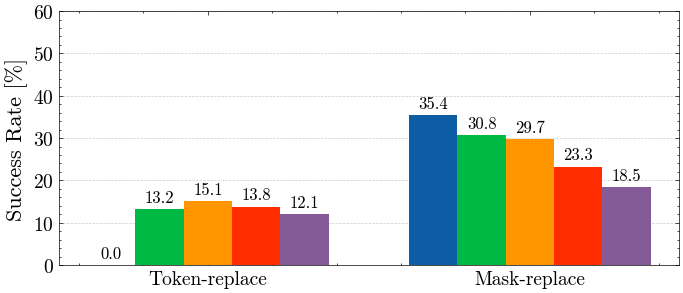

In [5]:
SAVE_DIR = "./layoutdm_correction"
if not os.path.exists(SAVE_DIR):
    os.makedirs(SAVE_DIR, exist_ok=True)

x_labels = ("Token-replace", "Mask-replace")
x_axis = np.arange(len(x_labels))

# NOTE: For full reproduction, please train LayoutDM using `src/trainer/trainer/config/model/layoutdm_custom_Q.yaml` to align with the following schedules.
# (acc_on_token_replace, acc_on_mask_replace)
key2scores = dict(
    beta_0_0=(0.0, 35.42),
    beta_0_005=(13.21, 30.75),
    beta_0_010=(15.08, 29.71),
    beta_005_0=(13.8, 23.28),
    beta_010_0=(12.09, 18.52),
)

h, w = 3.3, 8
y_lim = 60
fig, ax = plt.subplots(1, 1, figsize=(w, h))  # (nrow, ncol)
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)

multiplier = 0
width = 0.15
    
for key, scores in key2scores.items():
    offset = width * multiplier
    rects = ax.bar(x_axis + offset, scores, width, label=key)
    ax.bar_label(rects, padding=3, fmt="%.1f", fontsize=12)
    multiplier += 1
ax.set_ylabel("Success Rate [%]", fontsize=16)
ax.set_xticks(x_axis + width * 2, x_labels)
ax.set_yticks(np.arange(0, 70, 10))
ax.set_ylim(0, y_lim)
ax.grid(visible=False)
ax.grid(visible=True, alpha=0.2, axis="y")

fig.savefig(os.path.join(SAVE_DIR, "layoutdm_token_correction.pdf"))
plt.show()